# Target 3

In [1]:
#First import required libraries and uploaded the dataset.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# Load the CSV file into a DataFrame
final_data = pd.read_csv('new_dataset_without_outliers.csv')
final_data

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
2,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.37
3,6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86
4,7,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.80
8644,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.37
8645,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.19
8646,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.38


In [3]:
# Assuming your data is stored in a DataFrame named 'df'
final_data['Order_Date'] = pd.to_datetime(final_data['Order_Date'])  # Convert Order_Date to datetime



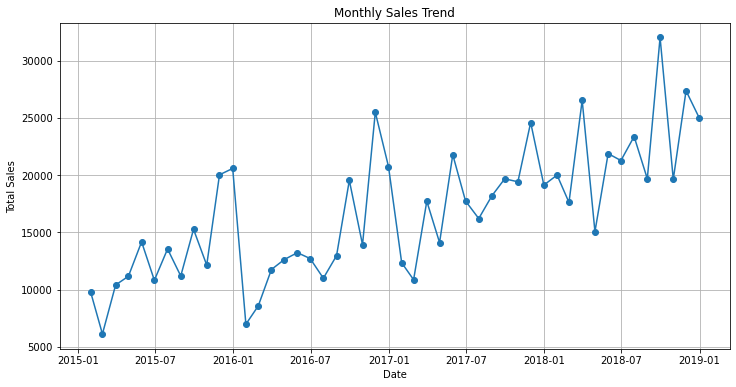

In [4]:
# Grouping sales by month and summing them up
monthly_sales = final_data.resample('M', on='Order_Date')['Sales'].sum()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

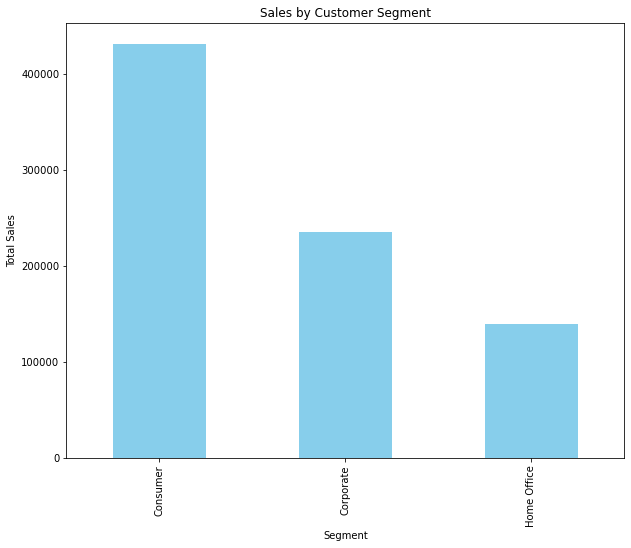

In [25]:
Customer_Segment_sales = final_data.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(10, 8))

# Plotting grouped sales
Customer_Segment_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

In [33]:
# Group by both 'Category' and 'Product_Name' and calculate the total sales
category_product_sales = final_data.groupby(['Category', 'Sub_Category'])['Sales'].sum()

# Display the result
category_product_sales

Category         Sub_Category
Furniture        Bookcases        40169.58
                 Chairs           91044.27
                 Furnishings      67580.47
                 Tables           44075.86
Office Supplies  Appliances       46720.70
                 Art              25584.36
                 Binders          59452.14
                 Envelopes        15521.32
                 Fasteners         3001.93
                 Labels           10932.05
                 Paper            74114.89
                 Storage          93655.45
                 Supplies          8893.48
Technology       Accessories      91421.92
                 Copiers           4859.81
                 Machines         12465.31
                 Phones          116360.14
Name: Sales, dtype: float64

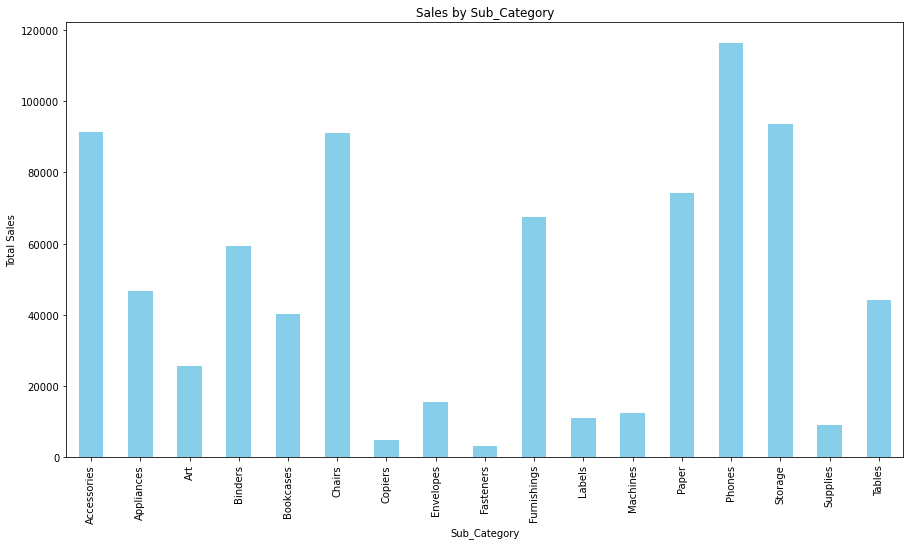

In [26]:
Sub_Category_sales = final_data.groupby('Sub_Category')['Sales'].sum()
plt.figure(figsize=(15, 8))

# Plotting grouped sales
Sub_Category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Sub_Category')
plt.xlabel('Sub_Category')
plt.ylabel('Total Sales')
plt.show()

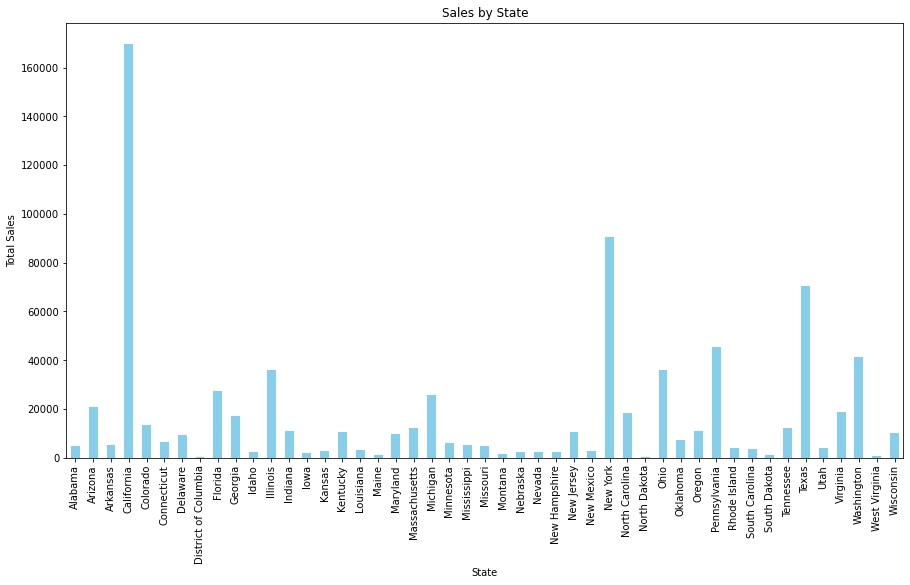

In [27]:
State_sales = final_data.groupby('State')['Sales'].sum()
plt.figure(figsize=(15, 8))
# Plotting grouped sales
State_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

C:\Users\diyav\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


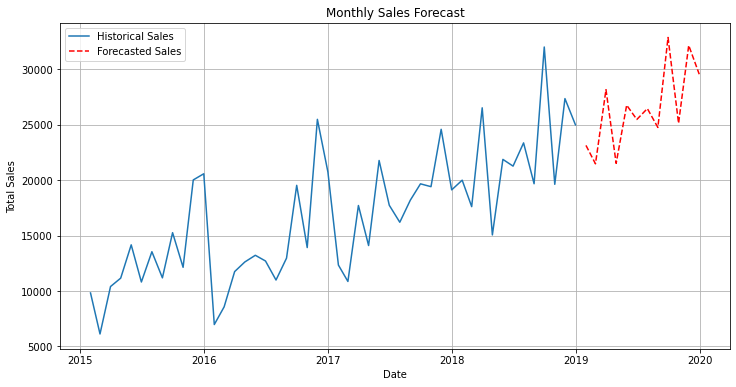

In [16]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

# Assuming your data is stored in a DataFrame named 'final_data'
final_data['Order_Date'] = pd.to_datetime(final_data['Order_Date'])
final_data = final_data.set_index('Order_Date')

# Resampling data to monthly frequency
monthly_sales = final_data['Sales'].resample('M').sum()

# Fitting a SARIMA model
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, s)
model = SARIMAX(monthly_sales, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Forecasting future sales
forecast_steps = 12  # Adjust the number of steps as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_sales.index[-1] + timedelta(days=1), periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean

# Plotting historical sales and forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales')
plt.plot(forecast_index, forecast_values, color='red', linestyle='dashed', label='Forecasted Sales')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()